<a href="https://colab.research.google.com/github/leachahine1/Python/blob/master/copy_of_blanks_predict_the_price_range_of_a_cell_phone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the Price Range of a Cell-Phone

---
© 2022 Zaka AI, Inc. All Rights Reserved


**Objective:** The goal of this colab is to predict the price range of a cell-phone given a set of features.

The dataset includes the following columns
* **battery_power:** Total energy a battery can store in one time measured in mAh
* **blue:** Has bluetooth or not
* **clock_speed:** speed at which microprocessor executes instructions
* **dual_sim:**Has dual sim support or not
* **fc:**Front Camera mega pixels
* **four_g:**Has 4G or not
* **int_memory:**Internal Memory in Gigabytes
* **m_dep:**Mobile Depth in cm
* **mobile_wt:**Weight of mobile phone
* **n_cores:**Number of cores of processor
* **pc:** Primary Camera mega pixels
* **px_height:** Pixel Resolution Height
* **px_width:**Pixel Resolution Width
* **ram:** Random Access Memory in Mega Bytes
* **sc_h:** Screen Height of mobile in cm
* **sc_w:** Screen Width of mobile in cm
* **talk_time:** longest time that a single battery charge will last when you are talking
* **three_g:** Has 3G or not
* **touch_screen:** Has touch screen or not
* **wifi:** Has wifi or not
* **price_range:** 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

##Import Libraries

We start by importing some libraries that we need

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Inspect the dataset

We Clone the Github repository containing the dataset.

In [7]:
!git clone https://github.com/zaka-ai/phone-price-range-prediction-workshop.git

Cloning into 'phone-price-range-prediction-workshop'...
remote: Enumerating objects: 6, done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 6
Unpacking objects: 100% (6/6), 45.71 KiB | 2.54 MiB/s, done.


We read the csv file that we have and put it in a pandas dataframe, and then use the df.head() to see the first five rows inside of it.

In [8]:
path = 'phone-price-range-prediction-workshop/mobile_prices.csv'
df = pd.read_csv(path)
#Print the first 5 rows of your dataset
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


To get the Shape of our dataset, we use df.shape

In [9]:
df.shape

(2000, 21)

Our dataset contains 2000 rows and 21 columns.

To get the data type of each column we use the df.info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

We can see that we don't have nulls in any column of the dataset.

##Exploratory Data Analysis

###Visualize the distribution of some categorical variables

To see the number of examples having a particular value in a categorical variable, we use the df[variable].value_counts(). This would return a series having the unique values along with their counts for that variable.
Let's do this for the clock_speed variable.

In [ ]:
clock_speed_value_counts = df['touch_screen'].value_counts()
clock_speed_value_counts

1    1006
0     994
Name: touch_screen, dtype: int64

Let's plot these value counts using a bar plot.

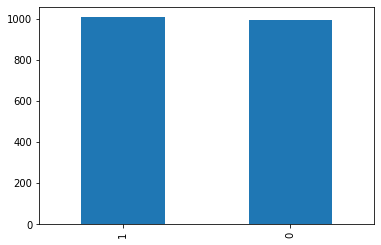

In [ ]:
clock_speed_value_counts.plot.bar()

The majority of the cell phones in our dataset have a 0.5 GHz clock speed 

Let's plot the value counts for the fc variable (Front Camera MPixels) but this time using a horizontal bar plot.

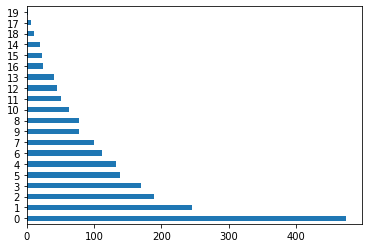

In [ ]:
df['fc'].value_counts().plot.barh()

The majority of the phones in the dataset have 0 MPixels front Camera (meaning no front camera)

Let's do the same for the pc variable (the primary camera MPixels)

In [ ]:
# Test your Zaka

We can see that the majority of the phones have 10 MP primary camera, and even some of them has 0 MP which means they have no camera at all.

Let's plot the value counts of the n_cores variable but this time using a pie chart.

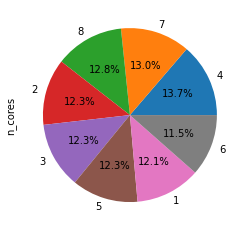

In [ ]:
df['n_cores'].value_counts().plot.pie(autopct='%1.1f%%') # autopct gives the auto percentage of a particular value

Let's see the price range value counts in our dataset using a pie chart.

In [ ]:
#Test your zaka

We have a perfectly balanced dataset.

###Visualize the distribution of some numerical variables

Not all the variables are categorical, some are numerical (have a continuous range of values). To visualize the distriutions of these variables, we use histograms. Let's see an example using the battery_power variable.

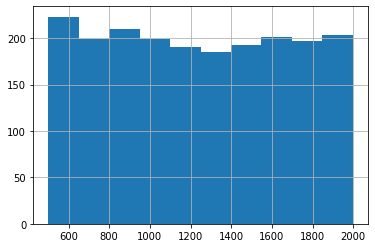

In [ ]:
df['battery_power'].hist()

We have almost a uniform distribution but phones with low battery power are slightly more than the others. 

###Study Correlation

Let's see through scatter plots if some variables are correlated with our target variable.

Let's observe correlation between the battery_power and the price_range. The alpha represents the blending value. It is between 0 (transparent) and 1 (opaque)

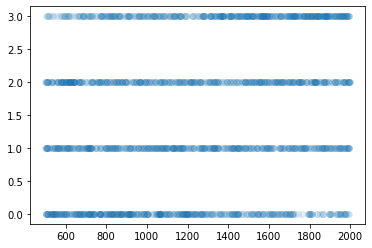

In [ ]:
plt.scatter(df['battery_power'], df['price_range'], alpha = 0.1)

For low price phone, the battery_power is more often low, and for high price phones, the battery power is more often high. We can see this from the intensity of the color.

Let's see the effect of the n_cores on the target variable.

In [ ]:
# Test your Zaka

We almost have the same intensity, so apparently, no strong correlation between n_cores and price_range

Let's see the effect of the amount of ram on the price_range

In [ ]:
# Test your Zaka

There is a clear correlation between the ram and the price range of a cell phone

Seeing Correlations through scatter plots was not very obvious in our problem, because most variables are categorical, and we need to tune the transparency to be able to discover correlation patterns.

##HeatMap

To get a better understanding and real number about correlation, we use what we call a HeatMap

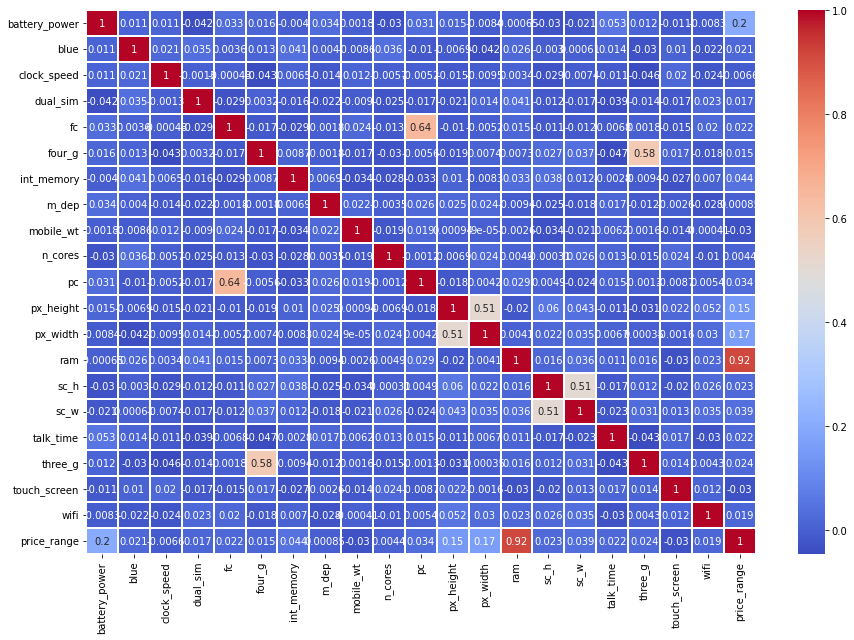

In [ ]:
import seaborn as sns
correlation_map = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_map, annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

We can verify our findings from the previous section using this heatmap

##Feature Selection

Ideally, We need the features to have no correlation between each other, and we need them to have high correlation with the target varible.

Now, we will drop the features whose correltion with the target is less than 0.15 

In [ ]:
# Get the correlation of all the features with the target variable
correlation_with_target = abs(correlation_map['price_range'])

# Filter the series you obtained to have only the features that have a correlation with the target variable > 0.15 
relevant_features = correlation_with_target[correlation_with_target > 0.15]
relevant_features

battery_power    0.200723
px_width         0.165818
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

#Modeling

##Normalizing the data

We normalize our data so that features have similar ranges and this way the model would treat them equally.

In [ ]:
#Take features and targets out of our dataset
x = df[['battery_power','px_width','ram']]
y = df.iloc[:,-1]

#Normalize the data
x = x.divide(x.max())
x.head()

,battery_power,px_width,ram
0,0.421421,0.378378,0.637569
1,0.511011,0.994995,0.658079
2,0.281782,0.858859,0.651076
3,0.307808,0.893894,0.692596
4,0.911411,0.606607,0.352926


Now we split the dataset between training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

##Model 1: KNN

The first model we will build is the KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Define the knn model
knn = KNeighborsClassifier(n_neighbors=5)
#Fit the knn on the training set
knn.fit(x_train,y_train)

KNeighborsClassifier()

Now we need to evaluate our model. We will evaluate it through accuracy and its confusion matrix.

In [ ]:
# Get the accuracy
accuracy = knn.score(x_test,y_test)
print (accuracy)

0.8725


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


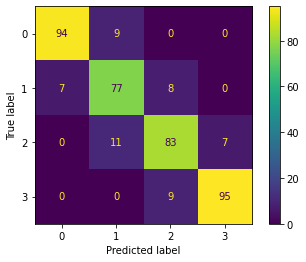

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test)

##Model 2: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Define the logistic regression model
lreg = LogisticRegression()
# Fit the model on the training set
lreg.fit(x_train,y_train)

LogisticRegression()

Let's ealuate this model

In [ ]:
#Compute the accuracy
accuracy = lreg.score(x_test,y_test)
print(accuracy)

KNeighborsClassifier()       battery_power  px_width       ram
51         0.880881  0.692192  0.513507
1327       0.474474  0.827828  0.875188
1488       0.479980  0.666166  0.768634
1432       0.315315  0.724725  0.303152
417        0.325826  0.429429  0.561281
...             ...       ...       ...
1251       0.659159  0.306807  0.859430
275        0.610611  0.967467  0.647574
1114       0.390891  0.303804  0.965983
1751       0.254254  0.598098  0.544022
72         0.302803  0.513514  0.098049

[400 rows x 3 columns] 51      2
1327    3
1488    3
1432    0
417     1
       ..
1251    3
275     2
1114    3
1751    1
72      0
Name: price_range, Length: 400, dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


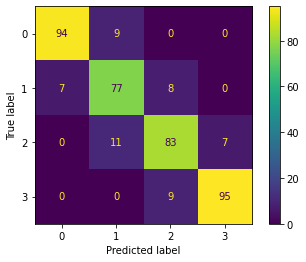

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(knn, x_test, y_test)

This model is better than the previous one.

##Model 3: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree model
dtree = DecisionTreeClassifier(max_leaf_nodes=5) # We limit the max_leaf_nodes to make trees shorter
# Fit the model on the training set
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

Let's evaluate the model

In [ ]:
#Computing accuracy
accuracy = dtree.score(x_test,y_test)
print(accuracy)

0.76


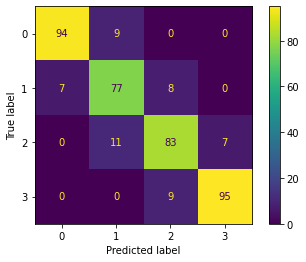

In [ ]:
#Plotting the confusion matrix
plot_confusion_matrix(knn, x_test, y_test)

Let's plot the tree to see how the decisions are made.

[Text(0.5, 0.875, 'ram <= 0.558\ngini = 0.75\nsamples = 1600\nvalue = [397, 408, 399, 396]\nclass = medium cost'),
 Text(0.25, 0.625, 'ram <= 0.277\ngini = 0.583\nsamples = 841\nvalue = [397, 361, 83, 0]\nclass = low cost'),
 Text(0.125, 0.375, 'gini = 0.214\nsamples = 361\nvalue = [317, 44, 0, 0]\nclass = low cost'),
 Text(0.375, 0.375, 'battery_power <= 0.557\ngini = 0.506\nsamples = 480\nvalue = [80, 317, 83, 0]\nclass = medium cost'),
 Text(0.25, 0.125, 'gini = 0.499\nsamples = 204\nvalue = [72, 125, 7, 0]\nclass = medium cost'),
 Text(0.5, 0.125, 'gini = 0.439\nsamples = 276\nvalue = [8, 192, 76, 0]\nclass = medium cost'),
 Text(0.75, 0.625, 'ram <= 0.754\ngini = 0.551\nsamples = 759\nvalue = [0, 47, 316, 396]\nclass = very high cost'),
 Text(0.625, 0.375, 'gini = 0.456\nsamples = 352\nvalue = [0, 47, 249, 56]\nclass = high cost'),
 Text(0.875, 0.375, 'gini = 0.275\nsamples = 407\nvalue = [0, 0, 67, 340]\nclass = very high cost')]

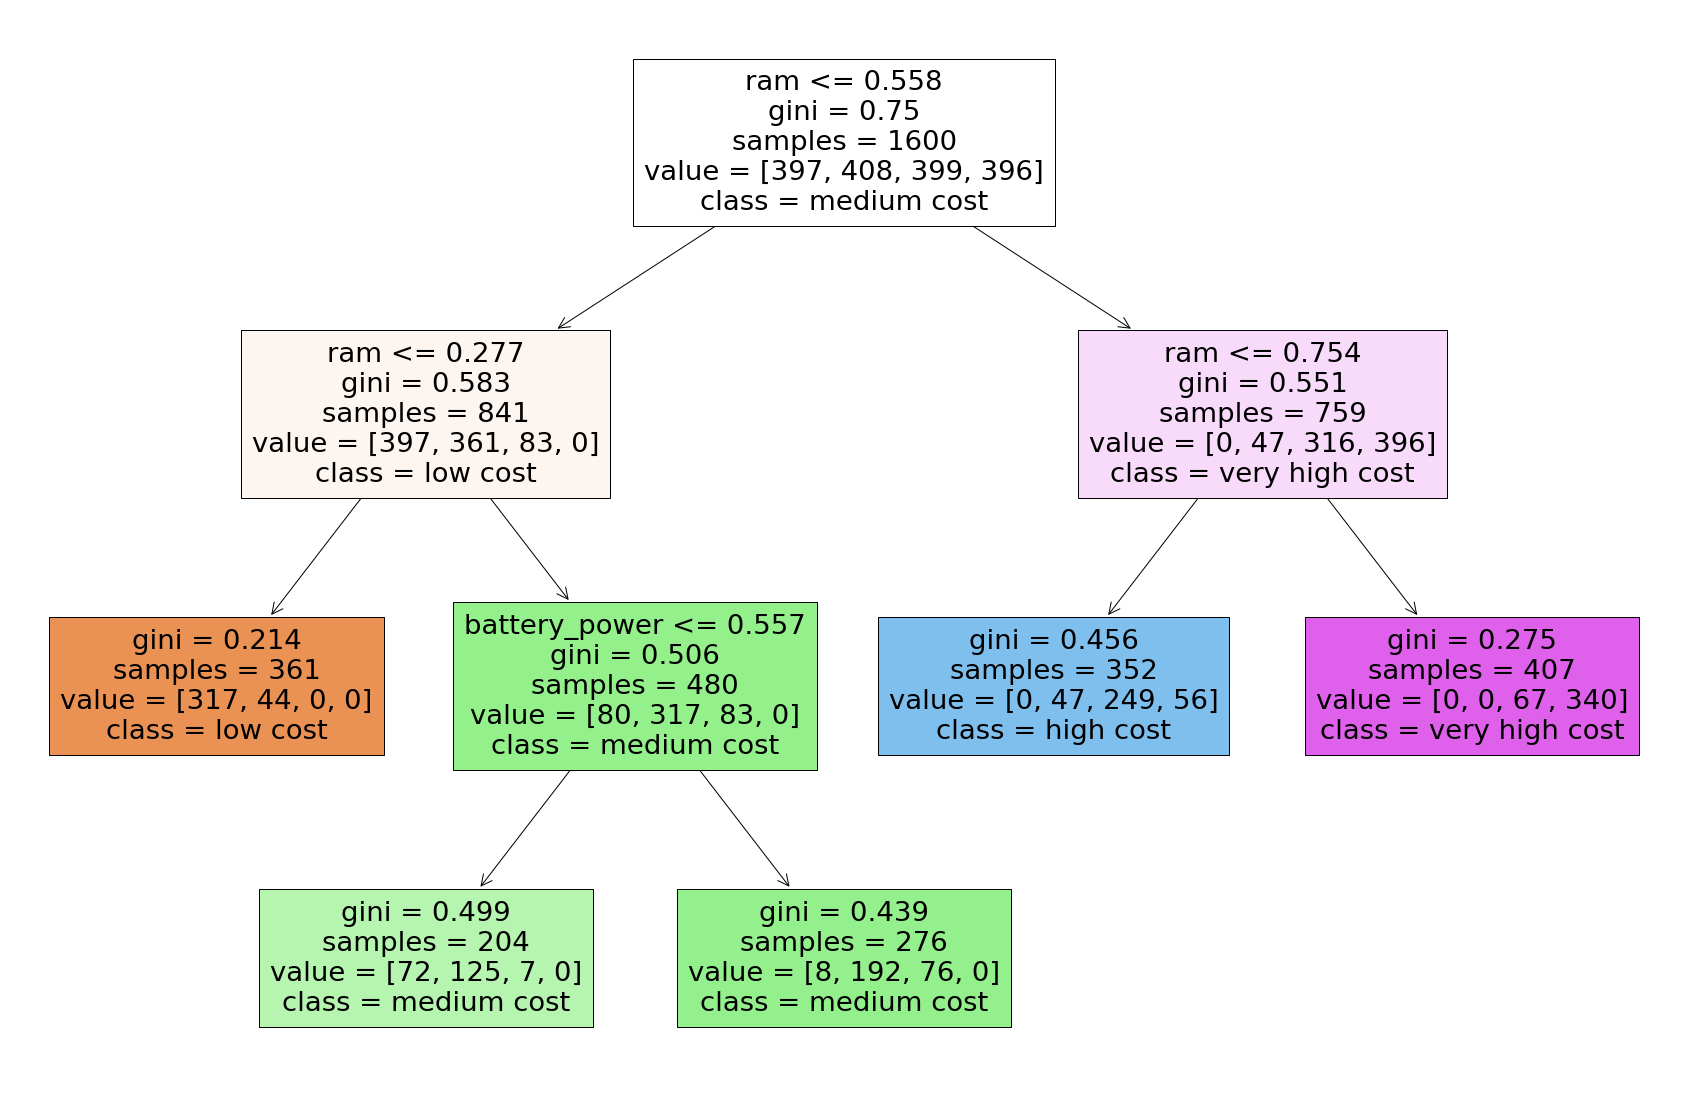

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(dtree, 
                   feature_names=x.columns,  
                   class_names=['low cost', 'medium cost', 'high cost', 'very high cost'],
                   filled=True)